# 1. 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from warnings import warn
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay



In [2]:
df = pd.read_csv('encoding_churn.csv')
df.head()

,gender,age,married,number_of_dependents,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn
0,0,37,1,0,2,9,0,1,42.39,0,...,1,1,1,65.6,593.30,0,381.51,974.81,Stayed,0
1,1,46,0,0,0,9,0,1,10.69,2,...,0,0,1,-4.0,542.40,10,96.21,610.28,Stayed,0
2,1,50,0,0,0,4,5,1,33.65,0,...,0,1,0,73.9,280.85,0,134.60,415.45,Churned,1
3,1,78,1,0,1,13,4,1,27.82,0,...,0,1,0,98.0,1237.85,0,361.66,1599.51,Churned,1
4,0,75,1,0,3,3,0,1,7.38,0,...,0,1,1,83.9,267.40,0,22.14,289.54,Churned,1


In [3]:
df = df[df['customer_status'] != 'Joined']
df = df.drop(columns = ['customer_status'])
df

,gender,age,married,number_of_dependents,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_extra_data_charges,total_long_distance_charges,total_revenue,churn
0,0,37,1,0,2,9,0,1,42.39,0,...,2,1,1,1,65.60,593.30,0,381.51,974.81,0
1,1,46,0,0,0,9,0,1,10.69,2,...,0,0,0,1,-4.00,542.40,10,96.21,610.28,0
2,1,50,0,0,0,4,5,1,33.65,0,...,2,0,1,0,73.90,280.85,0,134.60,415.45,1
3,1,78,1,0,1,13,4,1,27.82,0,...,2,0,1,0,98.00,1237.85,0,361.66,1599.51,1
4,0,75,1,0,3,3,0,1,7.38,0,...,2,0,1,1,83.90,267.40,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,36,0,0,0,4,0,1,2.01,0,...,1,0,0,0,20.95,85.50,0,8.04,93.54,1
7038,0,20,0,0,0,13,4,1,46.68,0,...,2,1,0,1,55.15,742.90,0,606.84,1349.74,0
7039,1,40,1,0,1,22,4,1,16.20,2,...,2,0,1,0,85.10,1873.70,0,356.40,2230.10,1
7041,1,21,1,0,5,67,1,1,2.12,0,...,2,2,0,1,67.85,4627.65,0,142.04,4769.69,0


In [4]:
df['churn'].unique()

array([0, 1])

# 2. 데이터 준비

In [5]:
X = df.drop(['churn'], axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4612, 29) (1977, 29)
(4612,) (1977,)


- test_size : 테스트 셋 구성의 비율
    - 0.2는 전체 데이터 셋의 20%를 test셋으로 지정하겠다는 의미
- shuffle : default = True  split을 해주기 이전에 섞을 건지 여부
- stratify : classfication을 다룰 때 매우 중요한 옵션값
    - 한쪽에 쏠려서 분배되는 것을 방지
- random_state : 세트를 섞을 때 해당 int값을 보고 섞으며
    - 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터 셋이 변경되는 것을 방지할 수 있음

# 3. 표준화 전처리

In [6]:
col = ['tenure_in_months', 'avg_monthly_long_distance_charges', 'monthly_charge', 'total_charges',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue']

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train[col])

X_train[col] = ss.transform(X_train[col])
X_test[col] = ss.transform(X_test[col])

In [7]:
df = df.drop(['gender'], axis = 1)

## 3-1. min/max scailing : 이상치 많은 컬럼에서

# 4. 모델링

In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(tree_method = 'hist'),
    'LightGBM': LGBMClassifier(),
    # 'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()),
    #                                            ('rf', RandomForestClassifier()), 
    #                                            ('gb', GradientBoostingClassifier())]),
    'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10),
    # 'Voting': VotingClassifier(estimators=[('lr', LogisticRegression()),
    #                                        ('rf', RandomForestClassifier()), 
    #                                        ('gb', GradientBoostingClassifier())])
}

## 4-1. 교차검증 없이

Logistic Regression:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1416
           1       0.74      0.73      0.73       561

    accuracy                           0.85      1977
   macro avg       0.82      0.81      0.81      1977
weighted avg       0.85      0.85      0.85      1977


ROC curve plot:


<Figure size 300x300 with 0 Axes>

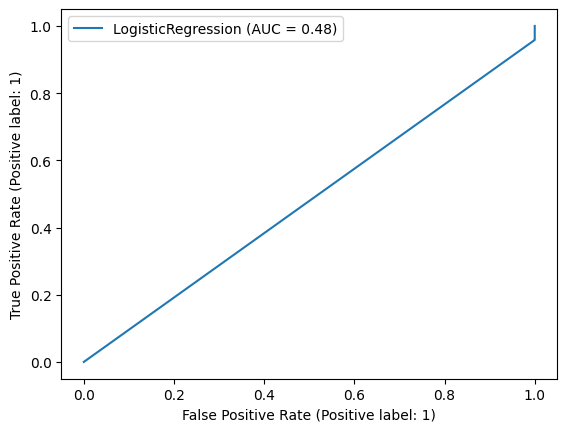


Decision Tree:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1416
           1       0.69      0.68      0.69       561

    accuracy                           0.82      1977
   macro avg       0.78      0.78      0.78      1977
weighted avg       0.82      0.82      0.82      1977


ROC curve plot:


<Figure size 300x300 with 0 Axes>

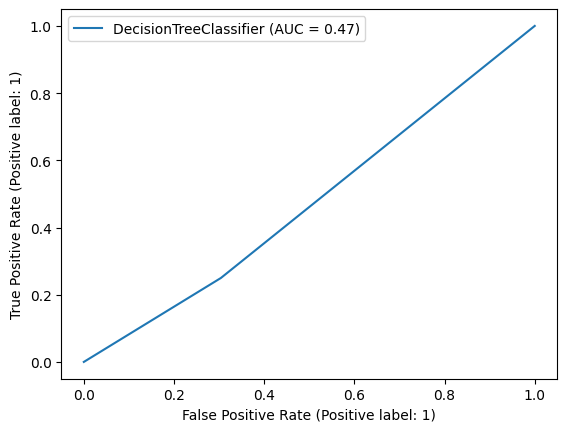


Random Forest:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1416
           1       0.85      0.65      0.74       561

    accuracy                           0.87      1977
   macro avg       0.86      0.80      0.83      1977
weighted avg       0.87      0.87      0.86      1977


ROC curve plot:


<Figure size 300x300 with 0 Axes>

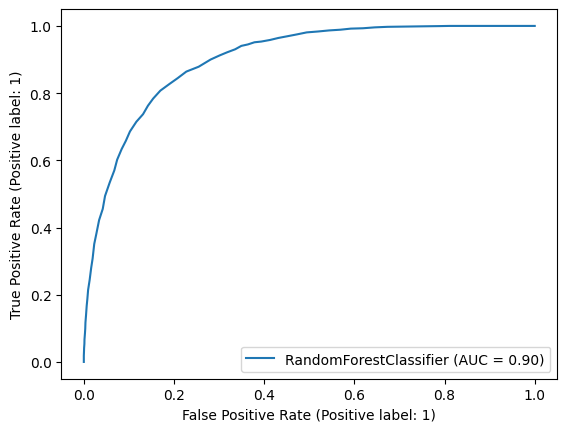


Gradient Boosting:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1416
           1       0.84      0.69      0.76       561

    accuracy                           0.87      1977
   macro avg       0.86      0.82      0.84      1977
weighted avg       0.87      0.87      0.87      1977


ROC curve plot:


<Figure size 300x300 with 0 Axes>

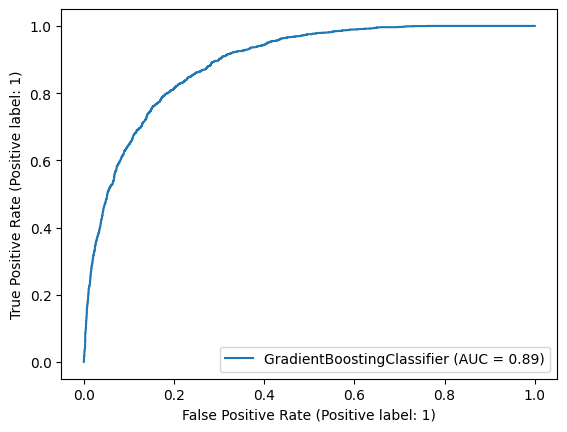


XGBoost:
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1416
           1       0.78      0.71      0.75       561

    accuracy                           0.86      1977
   macro avg       0.84      0.82      0.83      1977
weighted avg       0.86      0.86      0.86      1977


ROC curve plot:


<Figure size 300x300 with 0 Axes>

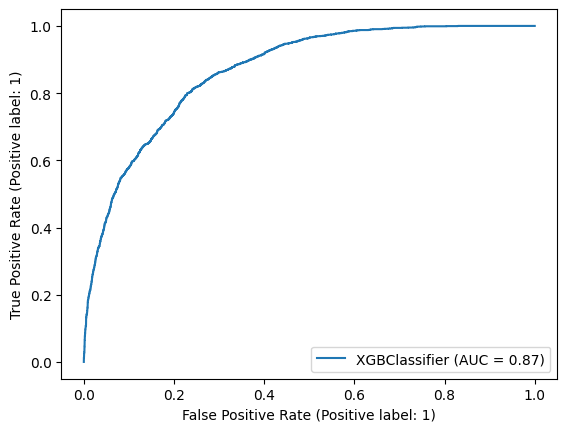


LightGBM:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1416
           1       0.82      0.70      0.76       561

    accuracy                           0.87      1977
   macro avg       0.85      0.82      0.83      1977
weighted avg       0.87      0.87      0.87      1977


ROC curve plot:


<Figure size 300x300 with 0 Axes>

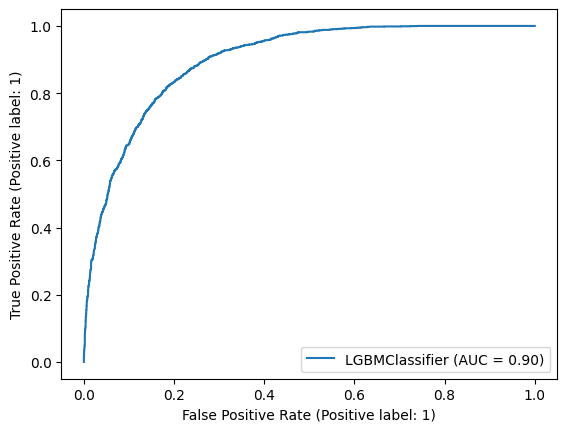


Bagging:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1416
           1       0.87      0.65      0.75       561

    accuracy                           0.87      1977
   macro avg       0.87      0.81      0.83      1977
weighted avg       0.87      0.87      0.87      1977


ROC curve plot:


<Figure size 300x300 with 0 Axes>

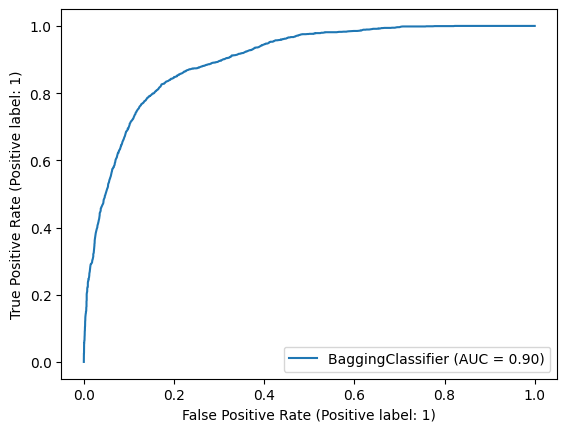

In [13]:
# roc plot

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy.mean(), 2)
    
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print()
    print("ROC curve plot:")
    fig = plt.figure(figsize=(3,3))
    fig.set_facecolor('white')
    RocCurveDisplay.from_estimator(model, X, y)
    # ax.plot([0, 1], [0, 1], color='red', label='Random Model')
    plt.legend()
    plt.show()
    print()
# Voting
# Stacking

## 4-2. K-fold 추가

In [14]:
model_names = [] # 각 모델 이름 리스트
acc_results = [] # 검증세트 정확도 점수 저장할 리스트 생성
auc_results = []
pre_results = []
rec_results = []
f1_results = []

result_col = ["Algorithm", "Accuracy", "ROC AUC", "Precision", "Recall", "f1 Score"] # 데이터 프레임 칼럼 리스트
model_results = pd.DataFrame(columns = result_col) # 데이터 프레임 생성, 칼럼은 상위 칼럼 리스트

# Perform K-fold cross-validation
i=0
for model_name, model in models.items():
    model_names.append(model_name)
    kf = KFold(n_splits = 5)
    
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy')
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'roc_auc')
    cv_pre_results = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'precision')
    cv_rec_results = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'recall')
    cv_f1_results = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    pre_results.append(cv_pre_results)
    rec_results.append(cv_rec_results)
    f1_results.append(cv_f1_results)
    
    model_results.loc[i] = [model_name,
                            np.mean(acc_results),
                            np.mean(auc_results),
                            np.mean(pre_results),
                            np.mean(rec_results),
                            np.mean(f1_results)]

    i+=1

model_results.sort_values(by = ['ROC AUC'], ascending=False)


,Algorithm,Accuracy,ROC AUC,Precision,Recall,f1 Score
0,Logistic Regression,0.843670,0.906552,0.725072,0.723378,0.723722
6,Bagging,0.860551,0.904533,0.791863,0.699385,0.738742
5,LightGBM,0.858919,0.901180,0.782582,0.705922,0.738861
4,XGBoost,0.856202,0.895106,0.777109,0.703531,0.734566
3,Gradient Boosting,0.852396,0.886930,0.768539,0.700850,0.728504
2,Random Forest,0.843814,0.869970,0.745062,0.699072,0.716093
1,Decision Tree,0.830877,0.843344,0.701196,0.714563,0.702695


## 4-3. 파라미터 튜닝

In [15]:
# build model
def build_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    auc_train = roc_auc_score(pred_train, y_train)
    auc_test = roc_auc_score(pred_test, y_test)
    acc_train = accuracy_score(pred_train, y_train) # 훈련 세트 예측과 훈련 세트 실제 타겟 간의 정확도 확인
    acc_test = accuracy_score(pred_test, y_test) # 테스트 세트 예측과 테스트 세트 실제 타겟 간의 정확도 확인
    
    print(f'Training roc_auc score {auc_train: .3f}') 
    print(f'Testing roc_auc score {auc_test: .3f}')
    print()
    print(f'Training accuracy score {acc_train: .3f}') 
    print(f'Testing accuracy score {acc_test: .3f}')

In [16]:
# tune parameters
def tuning_params(X, y, params, model):
    gs_acc = GridSearchCV(model, params, scoring = 'accuracy', cv = 5, n_jobs = -1)
    gs_auc = GridSearchCV(model, params, scoring = 'roc_auc', cv = 5, n_jobs = -1)
    
    gs_acc.fit(X, y)
    gs_auc.fit(X, y)
    
    print('Accuracy')
    print('Train score:', gs_acc.score(X_train, y_train))
    print('Best params:', gs_acc.best_params_)
    print("Best estimator: ", gs_acc.best_estimator_)
    print("Best score: ", gs_acc.best_score_)
    
    print('\nROC_AUC')
    print('Train score:', gs_auc.score(X_train, y_train))
    print('Best params:', gs_auc.best_params_)
    print("Best estimator: ", gs_auc.best_estimator_)
    print("Best score: ", gs_auc.best_score_)
    
    return gs_acc.best_estimator_, gs_auc.best_estimator_

In [17]:
# evaluating
def good_eval(X_train, X_test, y_train, y_test, goodmodel):
    goodmodel.fit(X_train, y_train)
    
    pred_goodmodel = goodmodel.predict(X_test)
    
    print('Results on test data: ')

    acc_ = accuracy_score(y_test, pred_goodmodel)
    pre_ = precision_score(y_test, pred_goodmodel)
    rec_ = recall_score(y_test, pred_goodmodel)
    auc_ = roc_auc_score(y_test, pred_goodmodel)

    print(f'Test accuracy = {acc_: .4f}') 
    print(f'Test precision = {pre_: .4f}') 
    print(f'Test recall = {rec_: .4f}') 
    print(f'Test auc = {auc_: .4f}')

    print("Classification report:")
    print(classification_report(y_test, pred_goodmodel))

    print("Confusion matrix (Rows actual, Columns predicted):")
    print(pd.DataFrame(confusion_matrix(y_test, pred_goodmodel)))

In [18]:
# roc plot
def roc_plot(model, X, y):
    print("ROC curve plot:")
    fig = plt.figure(figsize=(6,6))
    fig.set_facecolor('white')
    RocCurveDisplay.from_estimator(model, X, y)
    # ax.plot([0, 1], [0, 1], color='red', label='Random Model')
    plt.legend()
    plt.show()

# 5. 모델 선택

## Logistic Regression

In [20]:
lr = LogisticRegression(random_state = 42)
build_model(X_train, X_test, y_train, y_test, lr)

Training roc_auc score  0.809
Testing roc_auc score  0.816

Training accuracy score  0.845
Testing accuracy score  0.850


In [21]:
param1 = {'C':[10, 100, 1000], 'max_iter': [100, 300, 500, 700, 900, 1100]}
tuning_params(X_train, y_train, params = param1, model = lr)

/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Accuracy
Train score: 0.8514744145706852
Best params: {'C': 100, 'max_iter': 500}
Best estimator:  LogisticRegression(C=100, max_iter=500, random_state=42)
Best score:  0.849958284665443

ROC_AUC
Train score: 0.9134893947471697
Best params: {'C': 1000, 'max_iter': 300}
Best estimator:  LogisticRegression(C=1000, max_iter=300, random_state=42)
Best score:  0.9103900256361193


(LogisticRegression(C=100, max_iter=500, random_state=42),
 LogisticRegression(C=1000, max_iter=300, random_state=42))

Results on test data: 
Test accuracy =  0.8518
Test precision =  0.7419
Test recall =  0.7326
Test auc =  0.8158
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1416
           1       0.74      0.73      0.74       561

    accuracy                           0.85      1977
   macro avg       0.82      0.82      0.82      1977
weighted avg       0.85      0.85      0.85      1977

Confusion matrix (Rows actual, Columns predicted):
      0    1
0  1273  143
1   150  411
ROC curve plot:


<Figure size 600x600 with 0 Axes>

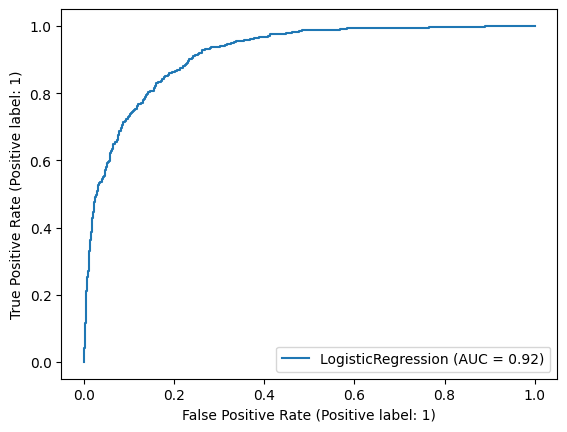

In [23]:
good_lr = LogisticRegression(C = 100, max_iter = 500, random_state = 42)
good_eval(X_train, X_test, y_train, y_test, goodmodel = good_lr)
roc_plot(model = good_lr, X = X_test, y = y_test)

## Bagging

In [26]:
# bag = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10)
# build_model(X_train, X_test, y_train, y_test, bag)
# print()
# print("Best parameter: ")
# param1 = [{'n_estimators': [100, 150, 200], 'max_samples': [1000, 2000], 'oob_score': [True, False]}]
# tuning_params(X_train, y_train, params = param1, model = bag)

In [27]:
# good_bag = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10)
# good_eval(X_train, X_test, y_train, y_test, goodmodel = good_bag)
# roc_plot(model = good_bag, X = X_test, y = y_test)

## LGBM

In [28]:
lgbm = LGBMClassifier(random_state = 42)
build_model(X_train, X_test, y_train, y_test, lgbm)
print()
print("Best parameter: ")
param1 = {'learning_rate': [0.1, 0.2, 0.3],
          'max_depth': [1, 3, 5, 7, 9],
          'n_estimators': [100, 300, 500, 700]}
tuning_params(X_train, y_train, params = param1, model = lgbm)

Training roc_auc score  0.974
Testing roc_auc score  0.853

Training accuracy score  0.977
Testing accuracy score  0.871

Best parameter: 
Accuracy
Train score: 0.8924544666088465
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best estimator:  LGBMClassifier(max_depth=3, random_state=42)
Best score:  0.879443623194196

ROC_AUC
Train score: 0.9554478493309935
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best estimator:  LGBMClassifier(max_depth=3, random_state=42)
Best score:  0.9375721927722275


(LGBMClassifier(max_depth=3, random_state=42),
 LGBMClassifier(max_depth=3, random_state=42))

Results on test data: 
Test accuracy =  0.8761
Test precision =  0.8435
Test recall =  0.6916
Test auc =  0.8204
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1416
           1       0.84      0.69      0.76       561

    accuracy                           0.88      1977
   macro avg       0.86      0.82      0.84      1977
weighted avg       0.87      0.88      0.87      1977

Confusion matrix (Rows actual, Columns predicted):
      0    1
0  1344   72
1   173  388
ROC curve plot:


<Figure size 600x600 with 0 Axes>

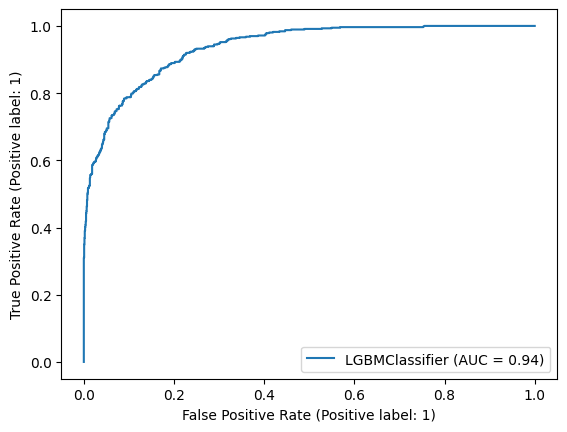

In [29]:
good_lgbm = LGBMClassifier(max_depth = 3, random_state = 42)
good_eval(X_train, X_test, y_train, y_test, goodmodel = good_lgbm)
roc_plot(model = good_lgbm, X = X_test, y = y_test)

## XGBoost

In [35]:
# build_model
xgb = XGBClassifier(tree_method = 'hist', random_state = 42) # (n_estimators=700, learning_rate=0.1, max_depth=3)
build_model(X_train, X_test, y_train, y_test, model = xgb)
# roc_plot(model = xgb, X = X_test, y = y_test)

Training roc_auc score  0.997
Testing roc_auc score  0.836

Training accuracy score  0.997
Testing accuracy score  0.862


In [36]:
# tuning_params
param1 = [{'n_estimators': [100, 300, 500, 700],
           'learning_rate': [0.1, 0.2, 0.3],
           'max_depth': [1, 3, 5, 7, 9]}]
tuning_params(X_train, y_train, params = param1, model = xgb)

Accuracy
Train score: 0.8924544666088465
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Best score:  0.8790109587946502

ROC_AUC
Train score: 0.9541557448667541
Best params: {'learning_rate': 0.1, 'max_depth': 3

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, ...),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric

Results on test data: 
Test accuracy =  0.8751
Test precision =  0.8369
Test recall =  0.6952
Test auc =  0.8208
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1416
           1       0.84      0.70      0.76       561

    accuracy                           0.88      1977
   macro avg       0.86      0.82      0.84      1977
weighted avg       0.87      0.88      0.87      1977

Confusion matrix (Rows actual, Columns predicted):
      0    1
0  1340   76
1   171  390
ROC curve plot:


<Figure size 600x600 with 0 Axes>

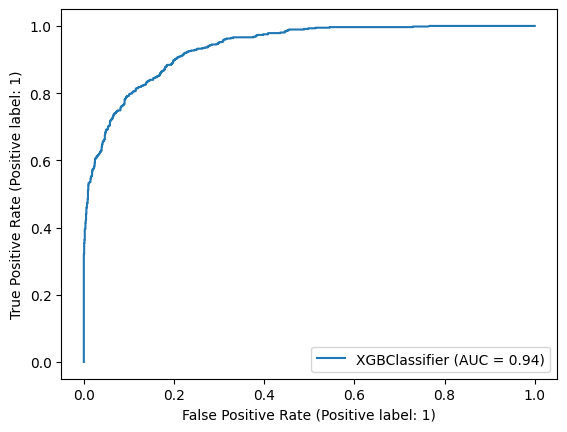

In [37]:
#evaluating
good_xgb = XGBClassifier(tree_method = 'hist', learning_rate = 0.1, max_depth = 3, n_estimators = 100, random_state = 42)
good_eval(X_train, X_test, y_train, y_test, goodmodel = good_xgb)
roc_plot(model = good_xgb, X = X_test, y = y_test)

## Gradient Boosting

In [39]:
gb = GradientBoostingClassifier(random_state = 42)
build_model(X_train, X_test, y_train, y_test, model = gb)
print()
print("Best parameter: ")
param1 = [{'n_estimators': [80, 100, 150, 200, 500],
         'learning_rate': [0.1, 0.2, 0.3],
         'max_depth': [1, 3, 5, 7, 9]}]
tuning_params(X_train, y_train, params = param1, model = gb)

Training roc_auc score  0.891
Testing roc_auc score  0.862

Training accuracy score  0.899
Testing accuracy score  0.875

Best parameter: 
Accuracy
Train score: 0.9631396357328708
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best estimator:  GradientBoostingClassifier(n_estimators=500, random_state=42)
Best score:  0.8805268117968617

ROC_AUC
Train score: 0.9591197260664489
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best estimator:  GradientBoostingClassifier(random_state=42)
Best score:  0.9383591766203272


(GradientBoostingClassifier(n_estimators=500, random_state=42),
 GradientBoostingClassifier(random_state=42))

Results on test data: 
Test accuracy =  0.8725
Test precision =  0.8212
Test recall =  0.7041
Test auc =  0.8217
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1416
           1       0.82      0.70      0.76       561

    accuracy                           0.87      1977
   macro avg       0.86      0.82      0.84      1977
weighted avg       0.87      0.87      0.87      1977

Confusion matrix (Rows actual, Columns predicted):
      0    1
0  1330   86
1   166  395
ROC curve plot:


<Figure size 600x600 with 0 Axes>

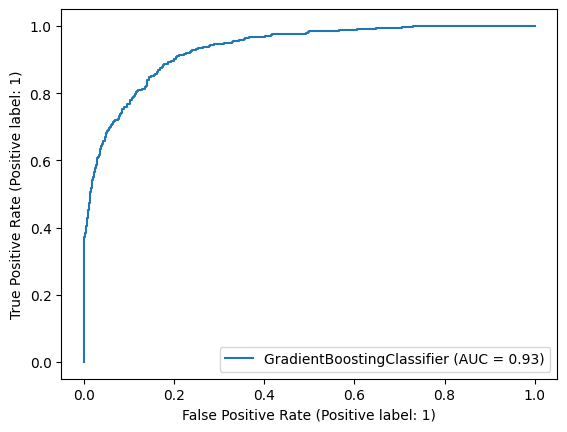

In [40]:
good_gb = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.1, max_depth = 3, random_state=42)
good_eval(X_train, X_test, y_train, y_test, goodmodel = good_gb)
roc_plot(model = good_gb, X = X_test, y = y_test)

In [44]:
# print(good_gb.feature_importances_)

# importances = good_gb.feature_importances_
# weights = pd.Series(importances,
#                  index=X.columns.values)
# weights.sort_values()[-10:].plot(kind = 'barh')

## Random Forest

In [41]:
rf = RandomForestClassifier(random_state = 42)
build_model(X_train, X_test, y_train, y_test, rf)

Training roc_auc score  1.000
Testing roc_auc score  0.864

Training accuracy score  1.000
Testing accuracy score  0.870


In [42]:
param1 = [{'n_estimators': [25, 50, 75],
           'max_features': [15, 20, 25],
           'max_leaf_nodes': [8, 16, 24]}]
tuning_params(X_train, y_train, params = param1, model = rf)

Accuracy
Train score: 0.8809627059843885
Best params: {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 75}
Best estimator:  RandomForestClassifier(max_features=15, max_leaf_nodes=16, n_estimators=75,
                       random_state=42)
Best score:  0.873156475982543

ROC_AUC
Train score: 0.9412053131779847
Best params: {'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 25}
Best estimator:  RandomForestClassifier(max_features=15, max_leaf_nodes=24, n_estimators=25,
                       random_state=42)
Best score:  0.9267399226511408


(RandomForestClassifier(max_features=15, max_leaf_nodes=16, n_estimators=75,
                        random_state=42),
 RandomForestClassifier(max_features=15, max_leaf_nodes=24, n_estimators=25,
                        random_state=42))

In [46]:
# good_rf = RandomForestClassifier(max_features=15, max_leaf_nodes=16, n_estimators=75, random_state=42)
# good_eval(X_train, X_test, y_train, y_test, goodmodel = good_rf)
# roc_plot(model = good_rf, X = X_test, y = y_test)

In [48]:
# good_rf = RandomForestClassifier(max_features=15, max_leaf_nodes=24, n_estimators=25, random_state=42)
# good_eval(X_train, X_test, y_train, y_test, goodmodel = good_rf)
# roc_plot(model = good_rf, X = X_test, y = y_test)

Results on test data: 
Test accuracy =  0.8715
Test precision =  0.8529
Test recall =  0.6613
Test auc =  0.8081
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1416
           1       0.85      0.66      0.74       561

    accuracy                           0.87      1977
   macro avg       0.86      0.81      0.83      1977
weighted avg       0.87      0.87      0.87      1977

Confusion matrix (Rows actual, Columns predicted):
      0    1
0  1352   64
1   190  371
ROC curve plot:


<Figure size 600x600 with 0 Axes>

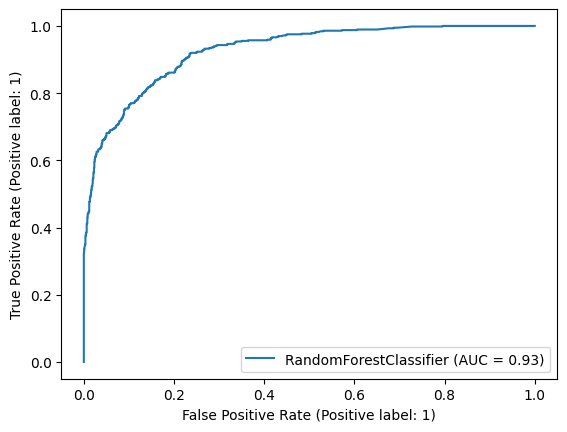

In [47]:
good_rf = RandomForestClassifier(max_features=15, max_leaf_nodes=24, n_estimators=50, random_state=42)
good_eval(X_train, X_test, y_train, y_test, goodmodel = good_rf)
roc_plot(model = good_rf, X = X_test, y = y_test)

In [49]:
# importances = good_rf.feature_importances_
# weights = pd.Series(importances,
#                  index=X.columns.values)
# weights.sort_values()[-10:].plot(kind = 'barh')

# 6. 최종 결과

## 6-1. ROC Curve

In [ ]:
# # individually

# fig = plt.figure(figsize=(6,6))
# fig.set_facecolor('white')
# RocCurveDisplay.from_estimator(good_lr, X_test, y_test)
# RocCurveDisplay.from_estimator(good_xgb, X_test, y_test)
# RocCurveDisplay.from_estimator(good_rf, X_test, y_test)
# RocCurveDisplay.from_estimator(good_gb, X_test, y_test)
# RocCurveDisplay.from_estimator(good_nbag, X_test, y_test)
# RocCurveDisplay.from_estimator(good_dt, X_test, y_test)
# RocCurveDisplay.from_estimator(goodsvm, X_test, y_test)
# RocCurveDisplay.from_estimator(good_lgbm, X_test, y_test)
# ax.plot([0, 1], [0, 1], color='red', label='Random Model')
# plt.legend()
# plt.show()

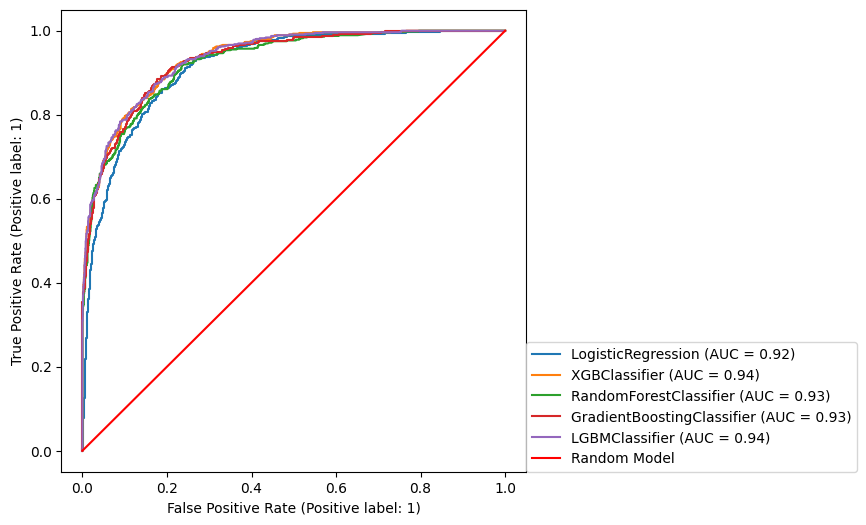

In [50]:
# roc plot

fig = plt.figure(figsize=(6,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(good_lr, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(good_xgb, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(good_rf, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(good_gb, X_test, y_test, ax=ax)
# RocCurveDisplay.from_estimator(good_bag, X_test, y_test, ax=ax)
# RocCurveDisplay.from_estimator(good_dt, X_test, y_test, ax=ax)
# RocCurveDisplay.from_estimator(goodsvm, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(good_lgbm, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red', label='Random Model')
ax.legend(loc = [1.0, 0])
plt.show()

In [52]:
print("good LGBM: ")
good_eval(X_train, X_test, y_train, y_test, goodmodel = good_lgbm)
print()
print("good XGB: ")
good_eval(X_train, X_test, y_train, y_test, goodmodel = good_xgb)

good LGBM: 
Results on test data: 
Test accuracy =  0.8761
Test precision =  0.8435
Test recall =  0.6916
Test auc =  0.8204
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1416
           1       0.84      0.69      0.76       561

    accuracy                           0.88      1977
   macro avg       0.86      0.82      0.84      1977
weighted avg       0.87      0.88      0.87      1977

Confusion matrix (Rows actual, Columns predicted):
      0    1
0  1344   72
1   173  388

good XGB: 
Results on test data: 
Test accuracy =  0.8751
Test precision =  0.8369
Test recall =  0.6952
Test auc =  0.8208
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1416
           1       0.84      0.70      0.76       561

    accuracy                           0.88      1977
   macro avg       0.86      0.82      0.84      1977
weighted avg   

## 6-2. 최적 모델 선택

In [53]:
models = {
    'Logistic Regression': good_lr,
    'Random Forest': good_rf,
    'Gradient Boosting': good_gb,
    'XGBoost': good_xgb,
    'LightGBM': good_lgbm,
    }

model_names_opt = [] # 각 모델 이름 리스트
acc_opt = [] # 검증세트 정확도 점수 저장할 리스트 생성
auc_opt = []
pre_opt = []
rec_opt = []
f1_opt = []

result_col_opt = ["Algorithm", "ROC AUC", "Accuracy", "Precision", "Recall", "f1 Score"] # 데이터 프레임 칼럼 리스트
results_opt = pd.DataFrame(columns = result_col_opt) # 데이터 프레임 생성, 칼럼은 상위 칼럼 리스트


i=0
for model_name, model in models.items():
    model_names_opt.append(model_name)
    kf = KFold(n_splits = 5)
    
    acc_results_opt = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy')
    auc_results_opt = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'roc_auc')
    pre_results_opt = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'precision')
    rec_results_opt = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'recall')
    f1_results_opt = model_selection.cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1')

    acc_opt.append(acc_results_opt)
    auc_opt.append(auc_results_opt)
    pre_opt.append(pre_results_opt)
    rec_opt.append(rec_results_opt)
    f1_opt.append(f1_results_opt)
    
    results_opt.loc[i] = [model_name,
                            np.mean(auc_results_opt),
                            np.mean(acc_results_opt),
                            np.mean(pre_results_opt),
                            np.mean(rec_results_opt),
                            np.mean(f1_results_opt)]

    i+=1

results_opt.sort_values(by = ['ROC AUC'], ascending=False)

,Algorithm,ROC AUC,Accuracy,Precision,Recall,f1 Score
3,XGBoost,0.937324,0.877276,0.835532,0.707247,0.764360
4,LightGBM,0.936844,0.878794,0.836653,0.712399,0.767870
2,Gradient Boosting,0.932927,0.879227,0.825212,0.727825,0.772679
1,Random Forest,0.925558,0.872290,0.846558,0.671526,0.747781
0,Logistic Regression,0.909967,0.849091,0.730756,0.740378,0.735153


# 7. 챔피언 모델: XGBoost

[0]	validation_0-logloss:0.64248
[1]	validation_0-logloss:0.60085
[2]	validation_0-logloss:0.56641
[3]	validation_0-logloss:0.53627
[4]	validation_0-logloss:0.51026
[5]	validation_0-logloss:0.48874
[6]	validation_0-logloss:0.46970
[7]	validation_0-logloss:0.45296
[8]	validation_0-logloss:0.43778
[9]	validation_0-logloss:0.42547
[10]	validation_0-logloss:0.41407
[11]	validation_0-logloss:0.40325
[12]	validation_0-logloss:0.39338
[13]	validation_0-logloss:0.38483
[14]	validation_0-logloss:0.37677
[15]	validation_0-logloss:0.36974
[16]	validation_0-logloss:0.36382
[17]	validation_0-logloss:0.35786
[18]	validation_0-logloss:0.35258
[19]	validation_0-logloss:0.34727
[20]	validation_0-logloss:0.34171
[21]	validation_0-logloss:0.33753
[22]	validation_0-logloss:0.33383
[23]	validation_0-logloss:0.33059
[24]	validation_0-logloss:0.32740
[25]	validation_0-logloss:0.32485
[26]	validation_0-logloss:0.32257
[27]	validation_0-logloss:0.32012
[28]	validation_0-logloss:0.31687
[29]	validation_0-loglos

<Figure size 600x600 with 0 Axes>

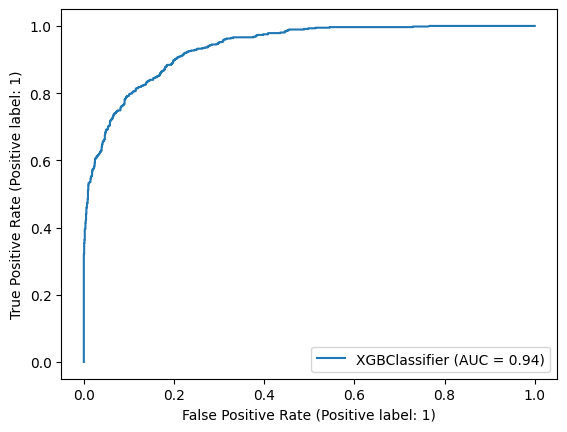

In [108]:
good_xgb = XGBClassifier(tree_method = 'hist', learning_rate = 0.1, max_depth = 3, n_estimators = 100, random_state = 42)
evals = [(X_test, y_test)]
good_xgb.fit(X_train, y_train, 
             early_stopping_rounds = 100, eval_metric="logloss", eval_set = evals, verbose=True)
y_pred = good_xgb.predict(X_test)

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('Results on test data: ')
    print('오차행렬:\n', confusion)
    # print("Confusion matrix (Rows actual, Columns predicted):")
    # print(pd.DataFrame(confusion_matrix(y_test, pred_xgb)))
    
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
    
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    roc_plot(model = good_xgb, X = X_test, y = y_test)

    
    
get_clf_eval(y_test, y_pred)


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

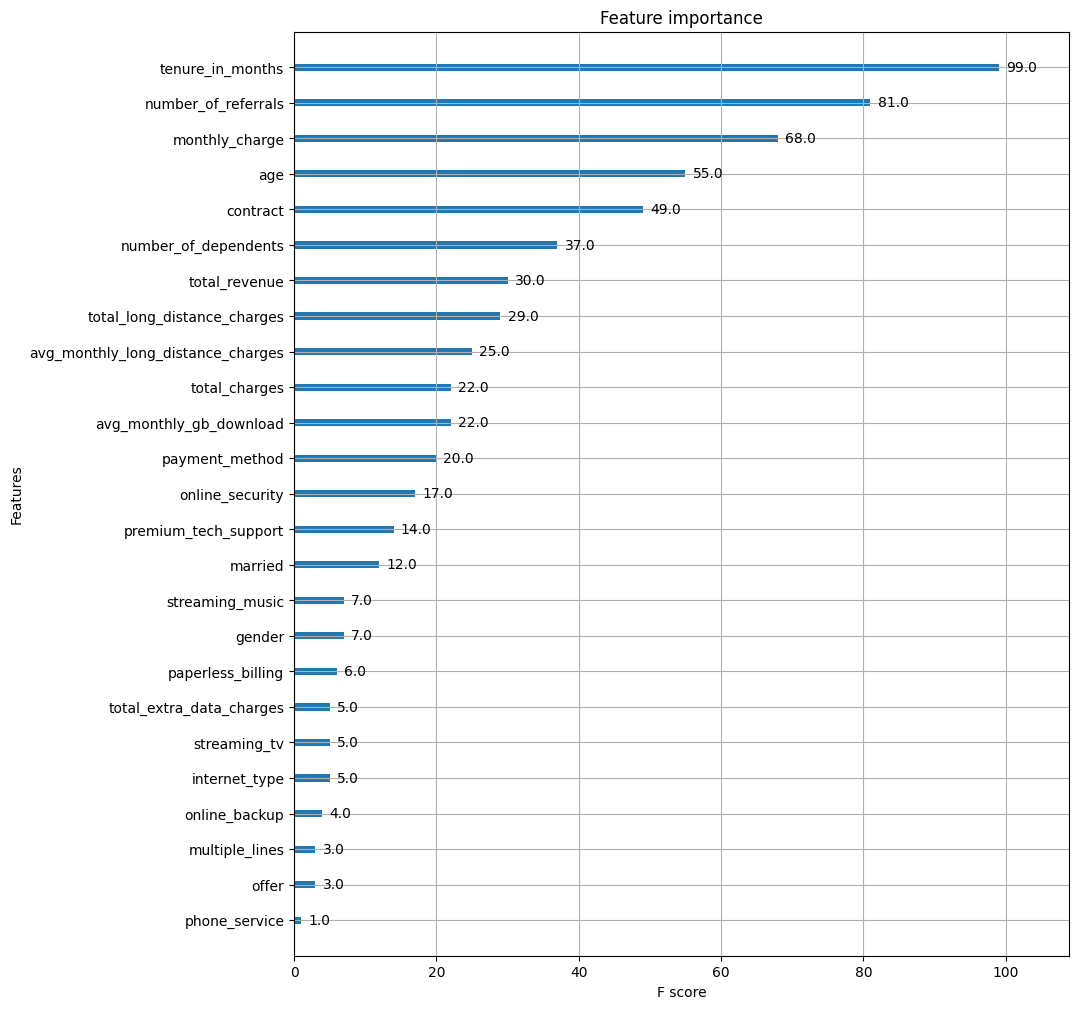

In [109]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(good_xgb, ax=ax)

# 기타 방법

In [95]:
# import xgboost as xgb
# from xgboost import plot_importance
# import pandas as pd
# import numpy as np

# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
# import warnings
# warnings.filterwarnings('ignore')

In [96]:
# df.head()

In [97]:
# print(df['churn'].value_counts())

In [98]:
# X = df.drop(['churn'], axis = 1)
# y = df['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, stratify = y)

# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

In [99]:
#넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환
# dtrain = xgb.DMatrix(data=X_train, label=y_train)
# dtest = xgb.DMatrix(data=X_test, label=y_test)

In [100]:
# params = {'max_depth': 3,
#          'eta': 0.3,
#           'objective': 'binary:logistic',
#           'early_stoppings': 100,
#           'eval_metric': 'logloss' # early_stopping 기능 수행을 위해 eval_set & eval_metrics 가 함께 설정되어 있어야 함.
#          }

# num_rounds = 100

# # max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# # 오류함수의 평가성능지표는 logloss
# # 부스팅 반복횟수는 400
# # 조기중단을 위한 최소 반복횟수는 100

In [101]:
# # train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
# xlist = [(dtrain, 'train'), (dtest,'eval')]
# # 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
# xgb_model = xgb.train(params = params, dtrain=dtrain, evals=xlist, num_boost_round=num_rounds)

In [102]:
# pred_probs = xgb_model.predict(dtest)
# print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# print(np.round(pred_probs[:10], 3))

# # 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
# preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
# print('예측값 10개만 표시: ', preds[:10])

In [103]:
# # 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
# def get_clf_eval(y_test, y_pred):
#     confusion = confusion_matrix(y_test, y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     F1 = f1_score(y_test, y_pred)
#     AUC = roc_auc_score(y_test, y_pred)
#     print('오차행렬:\n', confusion)
#     print('\n정확도: {:.4f}'.format(accuracy))
#     print('정밀도: {:.4f}'.format(precision))
#     print('재현율: {:.4f}'.format(recall))
#     print('F1: {:.4f}'.format(F1))
#     print('AUC: {:.4f}'.format(AUC))

In [104]:
# get_clf_eval(y_test, preds)

In [105]:
# from xgboost import plot_importance
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig, ax = plt.subplots(figsize=(10, 12))
# plot_importance(xgb_model, ax=ax)